In [1]:
##########################################################################
# Created on Sat Nov 21 15:05:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 15.2.Variance-Covariance Methon(VCM)

Mathimatical expression of VaR:
$$VaR=V_P\left[z_c \sigma_P-E(R_P)\right]\tag{15-3}$$
where,\
$V_P$:Market value of portfolio\
$z_c$:Quantile under standard normal distribution and take absolute value\
$E(R_P)$:Expected return of portfolio\
$\sigma_P$:Volatility of portfolio

$$E(R_P)=\sum_{i=1}^N\omega_iE(R_i)\tag{15-4}$$
$$\sigma_P^2=\sum_{i=1}^N\sum_{j=1}^N\omega_i\omega_jCov(R_i,R_j)=\sum_{i=1}^N\sum_{j=1}^N\omega_i\omega_j\rho_{ij}\sigma_i\sigma_j\tag{15-5}$$

In [4]:
def VaR_VCM(Value, Rp, Vp, X, N):
    '''Variance-Convariance Method to Calculate VaR
    Value: Value of portfolio
    Rp: Daily mean return of portfolio
    Vp: Daily volatility of portfolio
    X: Confidence level
    N: (days)Time horizon'''
    import scipy.stats as st
    from numpy import sqrt
    
    z=np.abs(st.norm.ppf(q=1-X))
    VaR_1day=Value*(z*Vp-Rp)
    VaR_Nday=sqrt(N)*VaR_1day
    return VaR_Nday

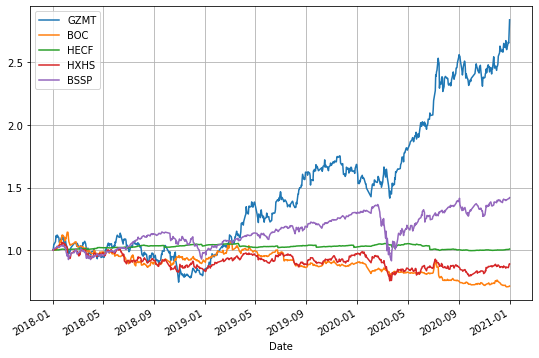

In [6]:
import pandas as pd

price=pd.read_excel('Portfolio asset daily price(2018-2020).xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
price=price.dropna()
price.index=pd.DatetimeIndex(price.index)
(price/price.iloc[0]).plot(figsize=(9,6),grid=True)

In [7]:
import numpy as np

R=np.log(price/price.shift(1))
R=R.dropna()
R.describe()

,GZMT,BOC,HECF,HXHS,BSSP
count,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.001482,-0.000480,0.000013,-0.000165,0.000497
std,0.020443,0.011458,0.002251,0.013269,0.015264
min,-0.105361,-0.078359,-0.027399,-0.059311,-0.127101
25%,-0.010090,-0.005227,0.000000,-0.006840,-0.004421
50%,0.000559,0.000000,0.000000,0.000320,0.001040
75%,0.013493,0.005000,0.000966,0.006937,0.007035
max,0.063483,0.073159,0.008675,0.057534,0.094474


In [11]:
R_mean=R.mean()
print('Daily mean return is\n',R_mean)

Daily mean return is
 GZMT    0.001482
BOC    -0.000480
HECF    0.000013
HXHS   -0.000165
BSSP    0.000497
dtype: float64


In [12]:
R_vol=R.std()
print('Daily volatility is\n',R_vol)

Daily volatility is
 GZMT    0.020443
BOC     0.011458
HECF    0.002251
HXHS    0.013269
BSSP    0.015264
dtype: float64


In [13]:
R_cov=R.cov()
R_corr=R.corr()
R_corr

,GZMT,BOC,HECF,HXHS,BSSP
GZMT,1.000000,0.309601,0.073192,0.507300,0.182159
BOC,0.309601,1.000000,0.137777,0.480258,0.143039
HECF,0.073192,0.137777,1.000000,0.053353,-0.023175
HXHS,0.507300,0.480258,0.053353,1.000000,0.326857
BSSP,0.182159,0.143039,-0.023175,0.326857,1.000000


In [14]:
W=np.array([0.15,0.2,0.5,0.05,0.10])
Rp_daily=np.sum(W*R_mean)
print('Daily mean return of portfolio is ',round(Rp_daily,6))

Daily mean return of portfolio is  0.000174


In [15]:
Vp_daily=np.sqrt(np.dot(W,np.dot(R_cov,W.T)))
print('Daily volatility of portfolio is ',round(Vp_daily,6))

Daily volatility of portfolio is  0.005581


In [16]:
value_port=1e10
D1=1
D2=10
X1=0.95
X2=0.99

VaR95_1day_VCM=VaR_VCM(Value=value_port,Rp=Rp_daily,Vp=Vp_daily,X=X1,N=D1)
VaR99_1day_VCM=VaR_VCM(Value=value_port,Rp=Rp_daily,Vp=Vp_daily,X=X2,N=D1)
VaR95_10day_VCM=VaR_VCM(Value=value_port,Rp=Rp_daily,Vp=Vp_daily,X=X1,N=D2)
VaR99_10day_VCM=VaR_VCM(Value=value_port,Rp=Rp_daily,Vp=Vp_daily,X=X2,N=D2)
print('1day 95VaR: ',f"{VaR95_1day_VCM:,.2f}")
print('1day 99VaR: ',f"{VaR99_1day_VCM:,.2f}")
print('10day 95VaR: ',f"{VaR95_10day_VCM:,.2f}")
print('10day 99VaR: ',f"{VaR99_10day_VCM:,.2f}")

1day 95VaR:  90,061,974.21
1day 99VaR:  128,097,870.58
10day 95VaR:  284,800,969.09
10day 99VaR:  405,081,034.45


# 15.3.Historical method

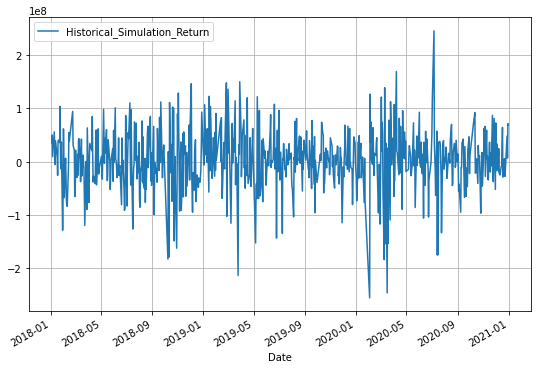

In [23]:
value_past=value_port*W
profit_past=np.dot(R,value_past)
profit_past=pd.DataFrame(data=profit_past,index=R.index,columns=['Historical_Simulation_Return'])
profit_past.plot(figsize=(9,6),grid=True)

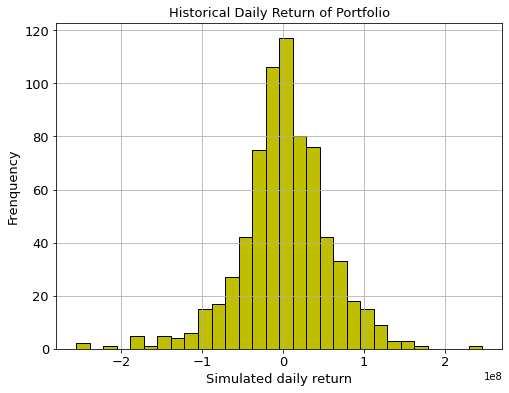

In [22]:
import matplotlib.pyplot as plt

#Normal test
plt.figure(figsize=(8,6))
plt.hist(np.array(profit_past),bins=30,facecolor='y',edgecolor='k')
plt.xticks(fontsize=13)
plt.xlabel('Simulated daily return',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Frenquency',fontsize=13)
plt.title('Historical Daily Return of Portfolio',fontsize=13)
plt.grid()
plt.show()

In [25]:
import scipy.stats as st
# Normarity Kolmogorov-Smirnov Tests
# H0:Normarity H1:No normarity
st.kstest(rvs=profit_past['Historical_Simulation_Return'],cdf='norm')

KstestResult(statistic=0.5213068181818181, pvalue=1.4935959618986873e-178)

In [26]:
# Normarity Anderson-Darling Tests
# H0:Normarity H1:No normarity
st.anderson(x=profit_past['Historical_Simulation_Return'],dist='norm')

AndersonResult(statistic=5.128400718185958, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [27]:
# Normarity Shapiro-Wilk Tests
# H0:Normarity H1:No normarity
st.shapiro(profit_past['Historical_Simulation_Return'])

ShapiroResult(statistic=0.9686521291732788, pvalue=3.921805241668963e-11)

In [28]:
# NormalTest
# H0:Normarity H1:No normarity
st.normaltest(profit_past['Historical_Simulation_Return'])

NormaltestResult(statistic=62.76332144812871, pvalue=2.3502708523936437e-14)

In [35]:
VaR95_1day_history=float(np.abs(profit_past.quantile(q=1-X1)))
VaR99_1day_history=float(np.abs(profit_past.quantile(q=1-X2)))
VaR95_10day_history=np.sqrt(D2)*VaR95_1day_history
VaR99_10day_history=np.sqrt(D2)*VaR99_1day_history
print('1day 95VaR(HS): ',f"{VaR95_1day_history:,.2f}")
print('1day 99VaR(HS): ',f"{VaR99_1day_history:,.2f}")
print('10day 95VaR(HS): ',f"{VaR95_10day_history:,.2f}")
print('10day 99VaR(HS): ',f"{VaR99_10day_history:,.2f}")

1day 95VaR(HS):  90,962,321.09
1day 99VaR(HS):  173,899,934.39
10day 95VaR(HS):  287,648,115.91
10day 99VaR(HS):  549,919,877.63


# 15.4.Monte Carlo simulation method

The price of financial assets follows a stochastic process.
$$P_{t}=P_{t-\Delta t}e^{\left(\mu-\frac{1}{2}\sigma^{2}\right)\Delta t+\sigma \epsilon_{t}\sqrt{\Delta t}}\tag{15-10}$$
$Assume \space\epsilon_{t}\space follows\space students\space t\space distribution\space or\space normal\space distribution$

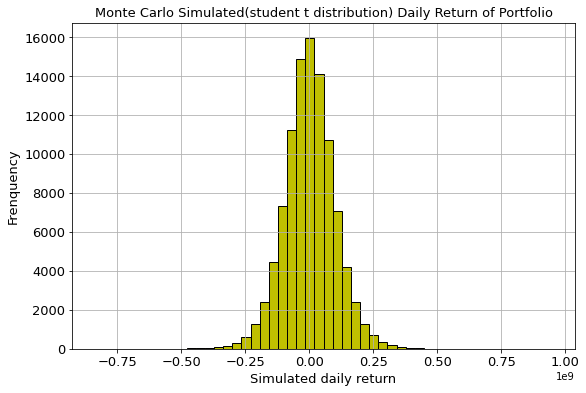

In [47]:
import numpy.random as npr

I=100000
n=8
epsilon=npr.standard_t(df=n,size=I)

P1=price.iloc[-1,0]
P2=price.iloc[-1,1]
P3=price.iloc[-1,2]
P4=price.iloc[-1,3]
P5=price.iloc[-1,-1]

R_mean=R.mean()*252 #Annualized mean return
R_vol=R.std()*np.sqrt(252) #Annualized volatility
dt=1/252

P1_new=P1*np.exp((R_mean[0]-0.5*R_vol[0]**2)*dt+R_vol[0]*epsilon*np.sqrt(dt))
P2_new=P2*np.exp((R_mean[1]-0.5*R_vol[1]**2)*dt+R_vol[1]*epsilon*np.sqrt(dt))
P3_new=P3*np.exp((R_mean[2]-0.5*R_vol[2]**2)*dt+R_vol[2]*epsilon*np.sqrt(dt))
P4_new=P4*np.exp((R_mean[3]-0.5*R_vol[3]**2)*dt+R_vol[3]*epsilon*np.sqrt(dt))
P5_new=P5*np.exp((R_mean[-1]-0.5*R_vol[-1]**2)*dt+R_vol[-1]*epsilon*np.sqrt(dt))

profit1=(P1_new/P1-1)*value_port*W[0]
profit2=(P2_new/P2-1)*value_port*W[1]
profit3=(P3_new/P3-1)*value_port*W[2]
profit4=(P4_new/P4-1)*value_port*W[3]
profit5=(P5_new/P5-1)*value_port*W[-1]
profit_port=profit1+profit2+profit3+profit4+profit5

plt.figure(figsize=(9,6))
plt.hist(profit_port,bins=50,facecolor='y',edgecolor='k')
plt.xticks(fontsize=13)
plt.xlabel('Simulated daily return',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Frenquency',fontsize=13,rotation='vertical')
plt.title('Monte Carlo Simulated(student t distribution) Daily Return of Portfolio',fontsize=13)
plt.grid()
plt.show()

In [48]:
VaR95_1day_MCst=np.abs(np.percentile(a=profit_port,q=(1-X1)*100))
VaR99_1day_MCst=np.abs(np.percentile(a=profit_port,q=(1-X2)*100))
VaR95_10day_MCst=np.sqrt(D2)*VaR95_1day_MCst
VaR99_10day_MCst=np.sqrt(D2)*VaR99_1day_MCst
print('1day 95VaR(MCst): ',f"{VaR95_1day_MCst:,.2f}")
print('1day 99VaR(MCst): ',f"{VaR99_1day_MCst:,.2f}")
print('10day 95VaR(MCst): ',f"{VaR95_10day_MCst:,.2f}")
print('10day 99VaR(MCst): ',f"{VaR99_10day_MCst:,.2f}")

1day 95VaR(MCst):  157,951,075.03
1day 99VaR(MCst):  243,408,309.29
10day 95VaR(MCst):  499,485,155.98
10day 99VaR(MCst):  769,724,658.75


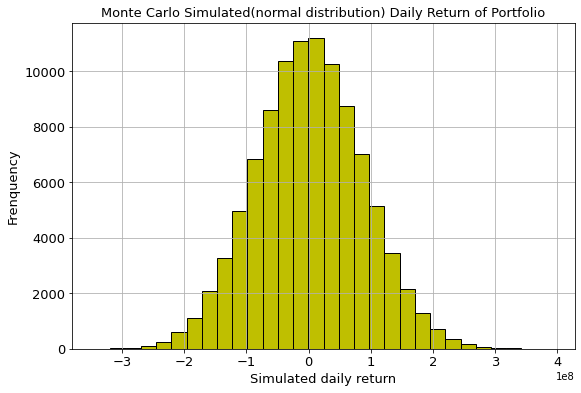

In [49]:
P=np.array(price.iloc[-1])
epsilon_norm=npr.standard_normal(I)
P_new=np.zeros(shape=(I,len(R_mean)))
for i in range(len(R_mean)):
    P_new[:,i]=P[i]*np.exp((R_mean[i]-0.5*R_vol[i]**2)*dt+R_vol[i]*epsilon_norm*np.sqrt(dt))
profit_port_norm=(np.dot(P_new/P-1,W))*value_port

plt.figure(figsize=(9,6))
plt.hist(profit_port_norm,bins=30,facecolor='y',edgecolor='k')
plt.xticks(fontsize=13)
plt.xlabel('Simulated daily return',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Frenquency',fontsize=13,rotation='vertical')
plt.title('Monte Carlo Simulated(normal distribution) Daily Return of Portfolio',fontsize=13)
plt.grid()
plt.show()

In [50]:
VaR95_1day_MCnorm=np.abs(np.percentile(a=profit_port_norm,q=(1-X1)*100))
VaR99_1day_MCnorm=np.abs(np.percentile(a=profit_port_norm,q=(1-X2)*100))
VaR95_10day_MCnorm=np.sqrt(D2)*VaR95_1day_MCnorm
VaR99_10day_MCnorm=np.sqrt(D2)*VaR99_1day_MCnorm
print('1day 95VaR(MCnorm): ',f"{VaR95_1day_MCnorm:,.2f}")
print('1day 99VaR(MCnorm): ',f"{VaR99_1day_MCnorm:,.2f}")
print('10day 95VaR(MCnorm): ',f"{VaR95_10day_MCnorm:,.2f}")
print('10day 99VaR(MCnorm): ',f"{VaR99_10day_MCnorm:,.2f}")

1day 95VaR(MCnorm):  140,151,507.52
1day 99VaR(MCnorm):  197,004,768.42
10day 95VaR(MCnorm):  443,197,981.28
10day 99VaR(MCnorm):  622,983,778.12


# 15.5.Back testing,Stress testing and Stressed VaR

### 15.5.1.Back testing

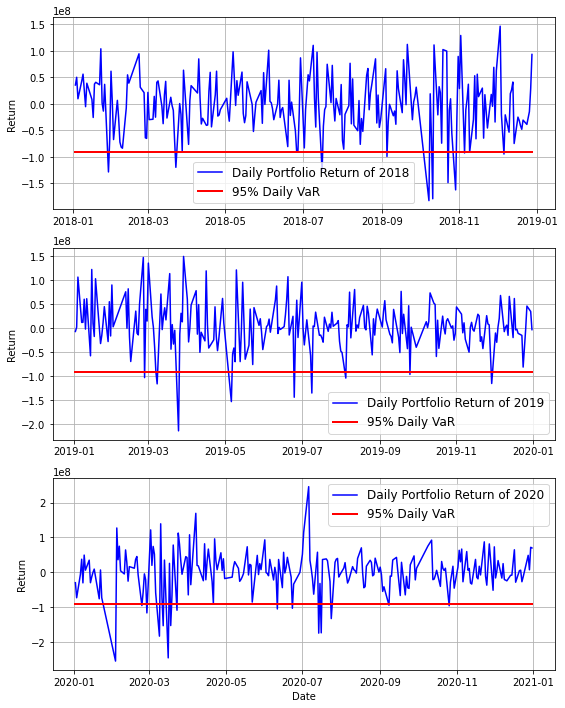

In [55]:
#Time series of daily return
profit_2018 = profit_past.loc['2018-01-01':'2018-12-31']
profit_2019 = profit_past.loc['2019-01-01':'2019-12-31']
profit_2020 = profit_past.loc['2020-01-01':'2020-12-31']

VaR_2018_neg=-VaR95_1day_VCM*np.ones_like(profit_2018)
VaR_2019_neg=-VaR95_1day_VCM*np.ones_like(profit_2019)
VaR_2020_neg=-VaR95_1day_VCM*np.ones_like(profit_2020)

VaR_2018_neg=pd.DataFrame(data=VaR_2018_neg,index=profit_2018.index)
VaR_2019_neg=pd.DataFrame(data=VaR_2019_neg,index=profit_2019.index)
VaR_2020_neg=pd.DataFrame(data=VaR_2020_neg,index=profit_2020.index)

plt.figure(figsize=(9,12))
plt.subplot(3,1,1)
plt.plot(profit_2018,'b-',label='Daily Portfolio Return of 2018')
plt.plot(VaR_2018_neg,'r-',label='95% Daily VaR',lw=2.0)
plt.ylabel('Return')
plt.legend(fontsize=12)
plt.grid()

plt.subplot(3,1,2)
plt.plot(profit_2019,'b-',label='Daily Portfolio Return of 2019')
plt.plot(VaR_2019_neg,'r-',label='95% Daily VaR',lw=2.0)
plt.ylabel('Return')
plt.legend(fontsize=12)
plt.grid()

plt.subplot(3,1,3)
plt.plot(profit_2020,'b-',label='Daily Portfolio Return of 2020')
plt.plot(VaR_2020_neg,'r-',label='95% Daily VaR',lw=2.0)
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(fontsize=12)
plt.grid()

plt.show()

In [56]:
days_2018 = len(profit_2018)
days_2019 = len(profit_2019)
days_2020 = len(profit_2020)
print('Trading days of 2018: ',days_2018)
print('Trading days of 2019: ',days_2019)
print('Trading days of 2020: ',days_2020)

Trading days of 2018:  234
Trading days of 2019:  236
Trading days of 2020:  234


In [57]:
day_except2018 = len(profit_2018[profit_2018['Historical_Simulation_Return']< -VaR95_1day_VCM])
day_except2019 = len(profit_2019[profit_2019['Historical_Simulation_Return']< -VaR95_1day_VCM])
day_except2020 = len(profit_2020[profit_2020['Historical_Simulation_Return']< -VaR95_1day_VCM])
print('Days exceeding VaR in 2018: ', day_except2018)
print('Ratio of exceeding VaR in 2018: ', round(day_except2018 / days_2018,4))
print('Days exceeding VaR in 2019: ', day_except2019)
print('Ratio of exceeding VaR in 2019: ', round(day_except2019 / days_2019,4))
print('Days exceeding VaR in 2020: ', day_except2020)
print('Ratio of exceeding VaR in 2020: ', round(day_except2020 / days_2020,4))

Days exceeding VaR in 2018:  12
Ratio of exceeding VaR in 2018:  0.0513
Days exceeding VaR in 2019:  10
Ratio of exceeding VaR in 2019:  0.0424
Days exceeding VaR in 2020:  15
Ratio of exceeding VaR in 2020:  0.0641


### 15.5.2.Stress testing

### 15.5.3.Stressed VaR

In [59]:
price_stress=pd.read_excel('Portfolio asset daily price(Stressed period).xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
price_stress=price_stress.dropna()
price_stress.index=pd.DatetimeIndex(price_stress.index)

R_stress=np.log(price_stress/price_stress.shift(1))
R_stress=R_stress.dropna()

profit_stress=np.dot(R_stress,value_past)
profit_stress=pd.DataFrame(data=profit_stress,index=R_stress.index,columns=['Historical_Simulation_Return'])
profit_stress.describe()

,Historical_Simulation_Return
count,1.390000e+02
mean,-9.082558e+06
std,1.077995e+08
min,-3.974723e+08
25%,-4.279709e+07
50%,-5.925511e+06
75%,3.900596e+07
max,2.966833e+08


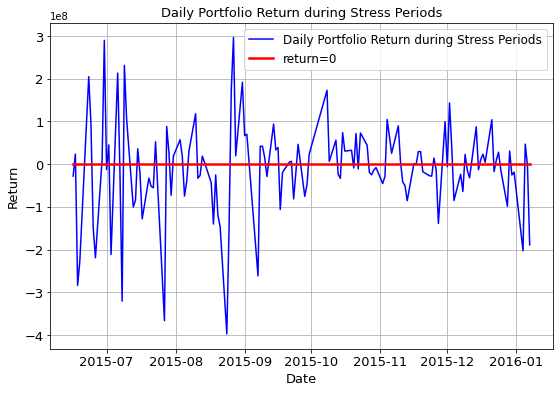

In [60]:
profit_zero = np.zeros_like(profit_stress)
profit_zero = pd.DataFrame(data=profit_zero,index=profit_stress.index)

plt.figure(figsize=(9,6))
plt.plot(profit_stress,'b-',label='Daily Portfolio Return during Stress Periods')
plt.plot(profit_zero,'r-',label='return=0',lw=2.5)
plt.xlabel('Date',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Return',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Daily Portfolio Return during Stress Periods', fontsize=13)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [62]:
SVaR95_1day=np.abs(np.percentile(a=profit_stress,q=(1-X1)*100))
SVaR99_1day=np.abs(np.percentile(a=profit_stress,q=(1-X2)*100))
SVaR95_10day=np.sqrt(D2)*SVaR95_1day
SVaR99_10day=np.sqrt(D2)*SVaR99_1day
print('1day 95VaR(Stressed): ',f"{SVaR95_1day:,.2f}")
print('1day 99VaR(Stressed): ',f"{SVaR99_1day:,.2f}")
print('10day 95VaR(Stressed): ',f"{SVaR95_10day:,.2f}")
print('10day 99VaR(Stressed): ',f"{SVaR99_10day:,.2f}")

1day 95VaR(Stressed):  212,292,866.22
1day 99VaR(Stressed):  348,978,592.42
10day 95VaR(Stressed):  671,328,988.27
10day 99VaR(Stressed):  1,103,567,206.69
